Original Dataset
 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm) species
               5.1               3.5                1.4               0.2  setosa
               4.9               3.0                1.4               0.2  setosa
               4.7               3.2                1.3               0.2  setosa
               4.6               3.1                1.5               0.2  setosa
               5.0               3.6                1.4               0.2  setosa

Dataset after One-Hot Encoding
 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  setosa  versicolor  virginica
               5.1               3.5                1.4               0.2     1.0         0.0        0.0
               4.9               3.0                1.4               0.2     1.0         0.0        0.0
               4.7               3.2                1.3               0.2     1.0         0.0        0.0
               4.6               3.1   

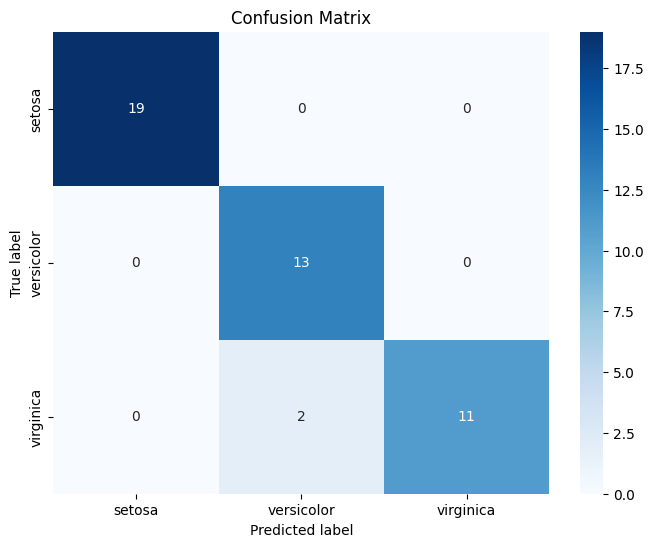

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.85      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [ ]:

# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define tcolors class for text formatting
class tcolors:
    BOLD = '\033[1m'
    ENDC = '\033[0m'

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Display the first few rows of the dataset
print(tcolors.BOLD + 'Original Dataset' + tcolors.ENDC)
print(iris_df.head().to_string(index=False))

# One-hot encode the species column
onehot = OneHotEncoder()
species_onehot = onehot.fit_transform(iris_df[['species']])

# Add the one-hot encoded columns to the DataFrame
species_onehot_df = pd.DataFrame(species_onehot.toarray(), columns=iris.target_names)
iris_df = pd.concat([iris_df, species_onehot_df], axis=1)

# Drop the original species column
iris_df.drop('species', axis=1, inplace=True)

# Display the updated DataFrame
print(tcolors.BOLD + '\nDataset after One-Hot Encoding' + tcolors.ENDC)
print(iris_df.head().to_string(index=False))

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of our training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Import necessary libraries for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=50)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Optional: Make a sample prediction
sample = X_test[0].reshape(1, -1)
prediction = knn.predict(sample)
print(f"\nSample prediction: {iris.target_names[prediction[0]]}")

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=iris.target_names, columns=iris.target_names)
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

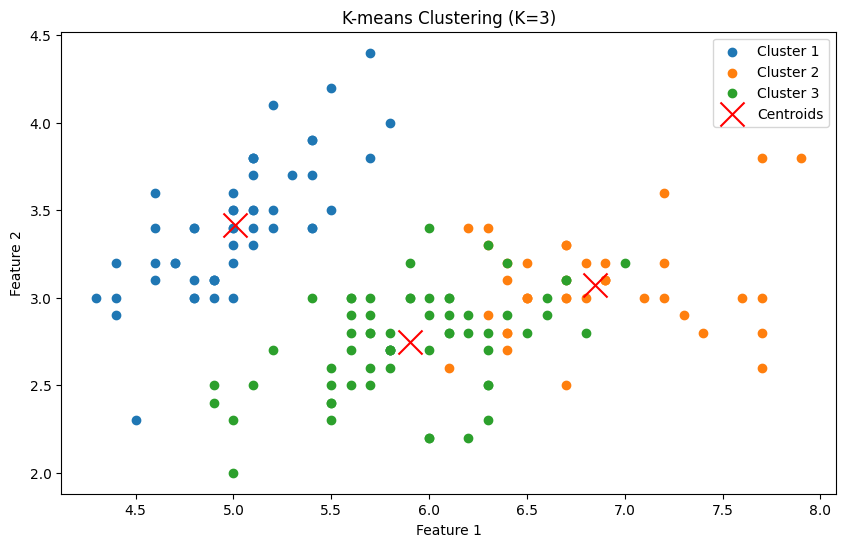

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("clustering_samples.csv")

# Convert data to numpy array for easier calculations
X = data.values

# Initialize K and the number of iterations
K = 3
max_iters = 50

# Randomly initialize the centroids by selecting K random points from the dataset
np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], K, replace=False)]

# Function to compute the Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# K-means algorithm
for _ in range(max_iters):
    # Step 1: Assign each point to the nearest centroid
    clusters = [[] for _ in range(K)]
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)

    # Step 2: Update centroids
    new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i]
                              for i, cluster in enumerate(clusters)])

    # Check for convergence (if centroids do not change)
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

# Assign each point a cluster label
labels = np.zeros(X.shape[0], dtype=int)
for i, cluster in enumerate(clusters):
    for point in cluster:
        labels[np.where((X == point).all(axis=1))[0][0]] = i

# Visualization of clusters
plt.figure(figsize=(10, 6))
for i in range(K):
    points = X[labels == i]
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {i+1}")
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title("K-means Clustering (K=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Dataset Preview:
  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

Pearson Correlation Matrix:
                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.

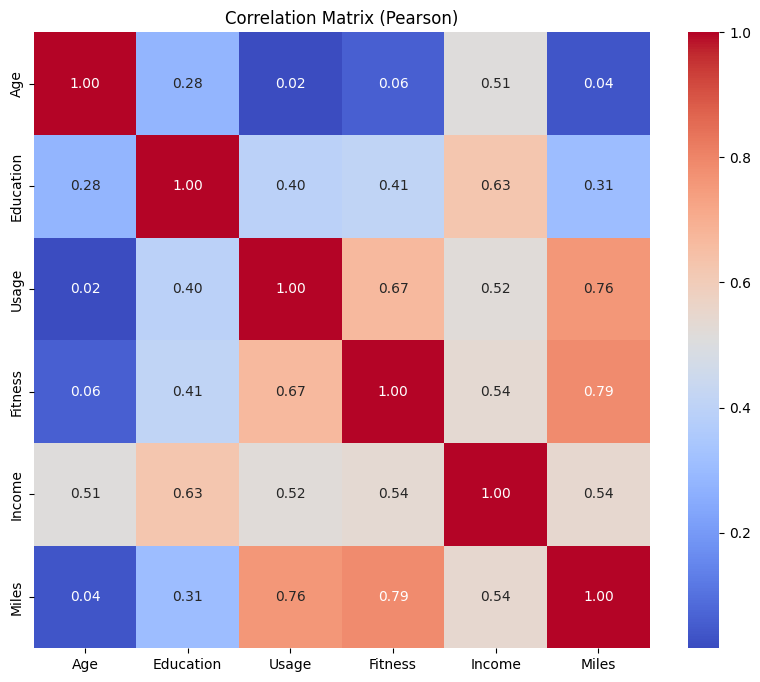

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("Fitness.csv")

# Display the first few rows of the dataset to understand its structure
print("Dataset Preview:")
print(data.head())

# Perform correlation analysis on numerical columns only
numerical_data = data.select_dtypes(include=[np.number])

# Calculate Pearson correlation coefficient
correlation_matrix = numerical_data.corr(method='pearson')

# Display the correlation matrix
print("\nPearson Correlation Matrix:")
print(correlation_matrix)

# (Optional) Visualize the correlation matrix as a heatmap for easier interpretation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title("Correlation Matrix (Pearson)")
plt.show()

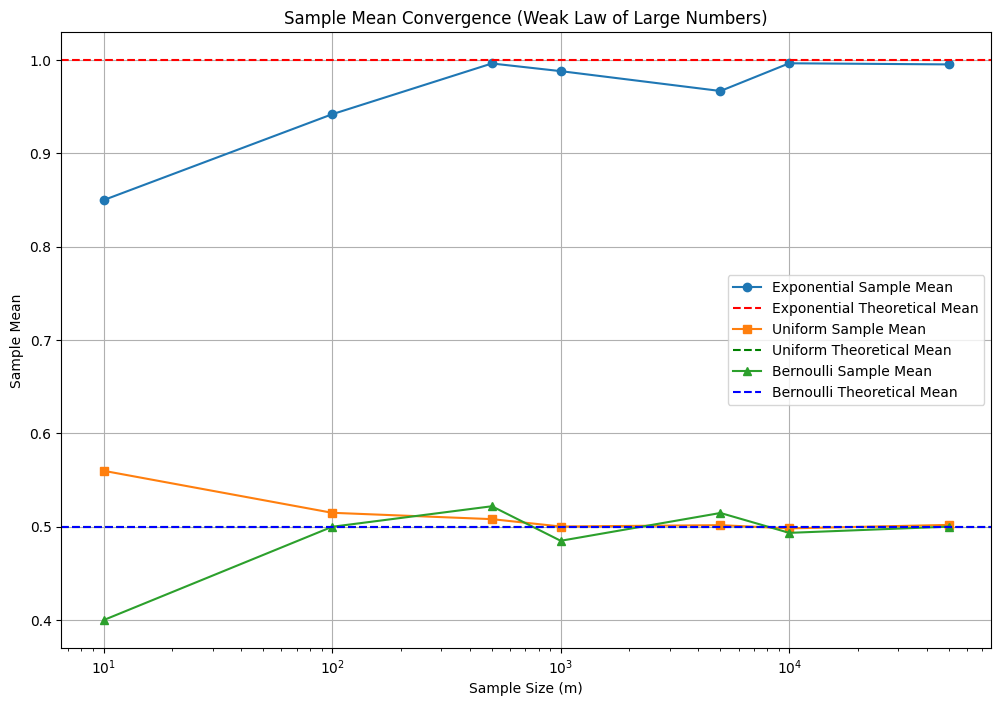

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set sample sizes
sample_sizes = [10, 100, 500, 1000, 5000, 10000, 50000]

# Define parameters for each distribution
lambda_exp = 1  # for Exponential distribution with mean 1/lambda
low, high = 0, 1  # for Uniform distribution in the range [0, 1]
p_bernoulli = 0.5  # for Bernoulli distribution with probability 0.5

# Theoretical means
mean_exp = 1 / lambda_exp
mean_uniform = (low + high) / 2
mean_bernoulli = p_bernoulli

# Store results for plotting
results = {
    'sample_size': [],
    'exp_mean': [],
    'uniform_mean': [],
    'bernoulli_mean': []
}

# Perform the experiment for each sample size
for m in sample_sizes:
    # Generate samples from each distribution
    exp_samples = np.round(np.random.exponential(scale=1/lambda_exp, size=m), 1)
    uniform_samples = np.round(np.random.uniform(low=low, high=high, size=m), 1)
    bernoulli_samples = np.round(np.random.binomial(n=1, p=p_bernoulli, size=m), 1)

    # Calculate sample means
    exp_mean = np.mean(exp_samples)
    uniform_mean = np.mean(uniform_samples)
    bernoulli_mean = np.mean(bernoulli_samples)

    # Append results
    results['sample_size'].append(m)
    results['exp_mean'].append(exp_mean)
    results['uniform_mean'].append(uniform_mean)
    results['bernoulli_mean'].append(bernoulli_mean)

# Convert results to DataFrame for plotting
results_df = pd.DataFrame(results)

# Plotting the sample means against sample sizes
plt.figure(figsize=(12, 8))

# Plot for Exponential distribution
plt.plot(results_df['sample_size'], results_df['exp_mean'], marker='o', label='Exponential Sample Mean')
plt.axhline(y=mean_exp, color='r', linestyle='--', label='Exponential Theoretical Mean')

# Plot for Uniform distribution
plt.plot(results_df['sample_size'], results_df['uniform_mean'], marker='s', label='Uniform Sample Mean')
plt.axhline(y=mean_uniform, color='g', linestyle='--', label='Uniform Theoretical Mean')

# Plot for Bernoulli distribution
plt.plot(results_df['sample_size'], results_df['bernoulli_mean'], marker='^', label='Bernoulli Sample Mean')
plt.axhline(y=mean_bernoulli, color='b', linestyle='--', label='Bernoulli Theoretical Mean')

# Customize the plot
plt.xscale('log')
plt.xlabel("Sample Size (m)")
plt.ylabel("Sample Mean")
plt.title("Sample Mean Convergence (Weak Law of Large Numbers)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("diabetes.csv")

# Display basic information about the dataset
print("Dataset Preview:")
print(data.head())

# Separate features and target variable
X = data.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target column
y = data['Outcome']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN model (choose k, e.g., k=5)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of KNN model with k={k}: {accuracy:.2f}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  \
0            6      148             72             35        0  33.6   50   
1            1       85             66             29        0  26.6   31   
2            8      183             64              0        0  23.3   32   
3            1       89             66             23       94  28.1   21   
4            0      137             40             35      168  43.1   33   

   Outcome  
0        1  
1        0  
2        1  
3        0  
4        1  

Accuracy of KNN model with k=5: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231


Confusion Matrix:
[[114  37]
 [ 35  45]]


In [ ]:

class Employee:
    def __init__(self, emp_id, name, sal):
        self.emp_id = emp_id
        self.name = name
        self.sal = sal

    def SalarySlip(self):
        # Ensure the minimum salary is Rs. 2000
        if self.sal < 2000:
            self.sal = 2000

        # Calculate Employee Basic Salary (which is equal to the given salary)
        emp_basic = self.sal

        # Calculate HRA (18% of salary)
        hra = 0.18 * emp_basic

        # Calculate DA (10% of salary)
        da = 0.10 * emp_basic

        # Calculate Gross Salary (Basic + HRA + DA)
        gross_sal = emp_basic + hra + da

        # Calculate TAX (10% of Gross Salary)
        tax = 0.10 * gross_sal

        # Calculate Net Salary (Gross Salary - Tax)
        net_sal = gross_sal - tax

        # Classify the employee into a group based on Gross Salary
        if gross_sal >= 2560 and gross_sal < 5000:
            group = "Group-A"
        elif gross_sal >= 5000 and gross_sal < 10000:
            group = "Group-B"
        elif gross_sal >= 10000:
            group = "Group-C"
        else:
            group = "Not Classified"

        # Display Salary Slip
        print("\nSalary Slip for Employee ID:", self.emp_id)
        print("Employee Name:", self.name)
        print("Employee Basic Salary: Rs.", round(emp_basic, 2))
        print("Employee HRA: Rs.", round(hra, 2))
        print("Employee DA: Rs.", round(da, 2))
        print("Employee Gross Salary: Rs.", round(gross_sal, 2))
        print("Employee Tax: Rs.", round(tax, 2))
        print("Employee Net Salary: Rs.", round(net_sal, 2))
        print("Employee Classification:", group)


# Main program to create N employees and display their Salary Slips
def main():
    N = int(input("Enter the number of employees: "))

    employees = []
    for i in range(N):
        emp_id = input(f"Enter Employee ID for employee {i+1}: ")
        name = input(f"Enter Name for employee {i+1}: ")
        sal = float(input(f"Enter Basic Salary for employee {i+1}: "))

        # Create an Employee object and append it to the list
        employee = Employee(emp_id, name, sal)
        employees.append(employee)

    # Display Salary Slips for each employee
    for employee in employees:
        employee.SalarySlip()

# Run the main function
if __name__ == "__main__":
    main()

Enter the number of employees: 1
Enter Employee ID for employee 1: 123D
Enter Name for employee 1: Ganesh
Enter Basic Salary for employee 1: 1000

Salary Slip for Employee ID: 123D
Employee Name: Ganesh
Employee Basic Salary: Rs. 2000
Employee HRA: Rs. 360.0
Employee DA: Rs. 200.0
Employee Gross Salary: Rs. 2560.0
Employee Tax: Rs. 256.0
Employee Net Salary: Rs. 2304.0
Employee Classification: Group-A


In [ ]:

def is_palindrome(num):
    return str(num) == str(num)[::-1]

def largest_palindrome_from_digits(digits):
    # Sort digits in descending order to form the largest number
    digits.sort(reverse=True)
    # Generate the number as a string
    number = ''.join(map(str, digits))
    # Check if the number is a palindrome
    if is_palindrome(number):
        return number
    return None

def read_matrix(N):
    matrix = []
    for i in range(N):
        row = []
        for j in range(N):
            while True:
                try:
                    element = int(input(f"Enter element for position ({i},{j}): "))
                    if element <= 0:
                        print("Element must be a positive integer. Please try again.")
                        continue
                    # Check constraints for upper triangular elements
                    if i < j:  # Upper triangular position
                        if element < 0 or element > 9:
                            print(f"Element at ({i},{j}) must be between 0 and 9. Please try again.")
                            continue
                    row.append(element)
                    break
                except ValueError:
                    print("Invalid input. Please enter a valid integer.")
        matrix.append(row)
    return matrix

def print_matrix(matrix):
    print("Matrix:")
    for row in matrix:
        print(" ".join(map(str, row)))

def extract_upper_triangular(matrix, N):
    upper_triangular = []
    for i in range(N):
        for j in range(i+1, N):
            upper_triangular.append(matrix[i][j])
    return upper_triangular

def main():
    N = int(input("Enter the size of the NxN matrix: "))

    matrix = read_matrix(N)

    # Print the matrix
    print_matrix(matrix)

    # Extract upper triangular elements (elements above the main diagonal)
    upper_triangular_digits = extract_upper_triangular(matrix, N)

    # Find the largest palindrome using the digits in the upper triangular part
    palindrome = largest_palindrome_from_digits(upper_triangular_digits)

    if palindrome:
        print(f"The largest palindrome number formed is: {palindrome}")
    else:
        print("No palindrome number can be formed.")

if __name__ == "__main__":
    main()

Enter the size of the NxN matrix: 2
Enter element for position (0,0): 1,1
Invalid input. Please enter a valid integer.
Enter element for position (0,0): 1
Enter element for position (0,1): 2
Enter element for position (1,0): 3
Enter element for position (1,1): 4
Matrix:
1 2
3 4
The largest palindrome number formed is: 2


In [ ]:

import numpy as np

def sum_above_below(matrix):
    # Sum of elements above the main diagonal
    above_sum = np.triu(matrix, k=1).sum()

    # Sum of elements below the main diagonal
    below_sum = np.tril(matrix, k=-1).sum()

    # Return the difference
    return above_sum - below_sum

def transpose(matrix):
    # Return the transpose of the matrix
    return np.transpose(matrix)

def determinant(matrix):
    # Return the determinant of the matrix
    return np.linalg.det(matrix)

def menu():
    print("Menu:")
    print("1. Sum of elements above the main diagonal minus sum of elements below the main diagonal")
    print("2. Transpose the matrix")
    print("3. Calculate the determinant of the matrix")
    print("4. Exit")

def main():
    # Input for the matrix size and elements
    n = int(input("Enter the size of the square matrix (n x n): "))
    matrix_elements = []
    print(f"Enter the elements of the {n}x{n} matrix:")

    for i in range(n):
        row = list(map(int, input(f"Row {i+1}: ").split()))
        matrix_elements.append(row)

    matrix = np.array(matrix_elements)

    while True:
        menu()
        choice = int(input("Enter your choice (1-4): "))

        if choice == 1:
            result = sum_above_below(matrix)
            print(f"Result: {result}")

        elif choice == 2:
            result = transpose(matrix)
            print("Transpose of the matrix:")
            print(result)

        elif choice == 3:
            result = determinant(matrix)
            print(f"Determinant of the matrix: {result}")

        elif choice == 4:
            print("Exiting...")
            break

        else:
            print("Invalid choice, please try again.")

if __name__ == "__main__":
    main()

Enter the size of the square matrix (n x n): 3
Enter the elements of the 3x3 matrix:
Row 1: 1 2 3
Row 2: 4 5 6
Row 3: 7 8 9
Menu:
1. Sum of elements above the main diagonal minus sum of elements below the main diagonal
2. Transpose the matrix
3. Calculate the determinant of the matrix
4. Exit
Enter your choice (1-4): 1
Result: -8
Menu:
1. Sum of elements above the main diagonal minus sum of elements below the main diagonal
2. Transpose the matrix
3. Calculate the determinant of the matrix
4. Exit
Enter your choice (1-4): 2
Transpose of the matrix:
[[1 4 7]
 [2 5 8]
 [3 6 9]]
Menu:
1. Sum of elements above the main diagonal minus sum of elements below the main diagonal
2. Transpose the matrix
3. Calculate the determinant of the matrix
4. Exit
Enter your choice (1-4): 3
Determinant of the matrix: 0.0
Menu:
1. Sum of elements above the main diagonal minus sum of elements below the main diagonal
2. Transpose the matrix
3. Calculate the determinant of the matrix
4. Exit
Enter your choice (1

In [ ]:

def convert_to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5/9

def convert_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

def main():
    while True:
        # Get user input
        temp_input = input("Enter temperature (e.g., 100C or 212F) or press Enter to quit: ").strip()

        # Exit the loop if input is empty
        if temp_input == "":
            print("Exiting...")
            break

        try:
            # Try to convert the input as Celsius (value followed by "C")
            if temp_input[-1].upper() == "C":
                celsius_value = float(temp_input[:-1])
                fahrenheit_value = convert_to_fahrenheit(celsius_value)
                print(f"{celsius_value}C is {fahrenheit_value:.2f}F")

            # If the above fails, try converting the input as Fahrenheit (value followed by "F")
            elif temp_input[-1].upper() == "F":
                fahrenheit_value = float(temp_input[:-1])
                celsius_value = convert_to_celsius(fahrenheit_value)
                print(f"{fahrenheit_value}F is {celsius_value:.2f}C")

            # If the suffix is not recognized, raise an error
            else:
                print("Invalid input. Please enter the temperature with a valid suffix (C or F).")

        except ValueError:
            print("Invalid input. Please enter a valid number followed by 'C' or 'F'.")

if __name__ == "__main__":
    main()

Enter temperature (e.g., 100C or 212F) or press Enter to quit: 97.3C
97.3C is 207.14F
Enter temperature (e.g., 100C or 212F) or press Enter to quit: 200f
200.0F is 93.33C
Enter temperature (e.g., 100C or 212F) or press Enter to quit: 0
Invalid input. Please enter the temperature with a valid suffix (C or F).
Enter temperature (e.g., 100C or 212F) or press Enter to quit: 
Exiting...


In [ ]:
# Q10
class Book:
    def __init__(self, book_id, title, author, publication_year):
        self.book_id = book_id
        self.title = title
        self.author = author
        self.publication_year = publication_year

    def update_author_or_title(self, author=None, title=None):
        if author:
            self.author = author
        if title:
            self.title = title

    def __str__(self):
        return f"Book ID: {self.book_id}, Title: {self.title}, Author: {self.author}, Publication Year: {self.publication_year}"

class Library:
    def __init__(self):
        self.books = {}

    def insert_book(self, book_id, title, author, publication_year):
        if book_id not in self.books:
            new_book = Book(book_id, title, author, publication_year)
            self.books[book_id] = new_book
            print("Book record inserted successfully.")
        else:
            print("Book ID already exists.")

    def delete_book(self, book_id):
        if book_id in self.books:
            del self.books[book_id]
            print(f"Book with ID {book_id} has been deleted.")
        else:
            print("Book ID not found.")

    def print_book_details(self, book_id):
        if book_id in self.books:
            print(self.books[book_id])
        else:
            print("Book ID not found.")

    def update_book(self, book_id, author=None, title=None):
        if book_id in self.books:
            self.books[book_id].update_author_or_title(author, title)
            print("Book details updated successfully.")
        else:
            print("Book ID not found.")

    def display_books_by_year(self, year):
        found = False
        for book in self.books.values():
            if book.publication_year == year:
                print(book)
                found = True
        if not found:
            print(f"No books found for the year {year}.")

def menu():
    print("\nLibrary Management System Menu:")
    print("1. Insert a book record")
    print("2. Delete a book record")
    print("3. Print book details")
    print("4. Update author or title of a book")
    print("5. Display all books published in a given year")
    print("6. Exit")

def main():
    library = Library()

    while True:
        menu()
        choice = input("Enter your choice (1-6): ")

        if choice == "1":
            book_id = input("Enter Book ID: ")
            title = input("Enter Book Title: ")
            author = input("Enter Author Name: ")
            publication_year = input("Enter Publication Year: ")
            library.insert_book(book_id, title, author, int(publication_year))

        elif choice == "2":
            book_id = input("Enter Book ID to delete: ")
            library.delete_book(book_id)

        elif choice == "3":
            book_id = input("Enter Book ID to view details: ")
            library.print_book_details(book_id)

        elif choice == "4":
            book_id = input("Enter Book ID to update: ")
            author = input("Enter new Author Name (or press Enter to skip): ")
            title = input("Enter new Title (or press Enter to skip): ")
            library.update_book(book_id, author if author else None, title if title else None)

        elif choice == "5":
            year = int(input("Enter the year to display books published in that year: "))
            library.display_books_by_year(year)

        elif choice == "6":
            print("Exiting the program...")
            break

        else:
            print("Invalid choice, please try again.")

if __name__ == "__main__":
    main()


Library Management System Menu:
1. Insert a book record
2. Delete a book record
3. Print book details
4. Update author or title of a book
5. Display all books published in a given year
6. Exit
Enter your choice (1-6): 1
Enter Book ID: 123D
Enter Book Title: Thermal
Enter Author Name: Raj
Enter Publication Year: 2025
Book record inserted successfully.

Library Management System Menu:
1. Insert a book record
2. Delete a book record
3. Print book details
4. Update author or title of a book
5. Display all books published in a given year
6. Exit
Enter your choice (1-6): 3
Enter Book ID to view details: 123D
Book ID: 123D, Title: Thermal, Author: Raj, Publication Year: 2025

Library Management System Menu:
1. Insert a book record
2. Delete a book record
3. Print book details
4. Update author or title of a book
5. Display all books published in a given year
6. Exit
Enter your choice (1-6): 5
Enter the year to display books published in that year: 2025
Book ID: 123D, Title: Thermal, Author: R